<a href="https://colab.research.google.com/github/withoutblank/COMP3331_9331_22t2/blob/main/COMP9517_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare environment and dataset

In [9]:
!pip install kaggle --upgrade
!cp -r /content/drive/MyDrive/Kaggle/kaggle.json ../root/.kaggle/kaggle.json
!chmod 600 ../root/.kaggle/kaggle.json
!kaggle --version
#download dataset
!kaggle competitions download -c tensorflow-great-barrier-reef

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Kaggle API 1.5.12
100% 14.2G/14.2G [02:57<00:00, 104MB/s]
100% 14.2G/14.2G [02:57<00:00, 85.7MB/s]


In [10]:
!unzip tensorflow-great-barrier-reef.zip -d ./great-barrier-reef

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: ./great-barrier-reef/train_images/video_2/4303.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4304.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4305.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4306.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4307.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4308.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4309.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/431.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4310.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4311.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4312.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4313.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4314.jpg  
  inflating: ./great-barrier-reef/train_images/video_2/4315.jpg  
  inflating: ./great-barrier-reef/train_images/vid

In [11]:
!mkdir ./great-barrier-reef/train_images/train
!mkdir ./great-barrier-reef/train_images/train/images
!mkdir ./great-barrier-reef/train_images/train/labels

!mkdir ./great-barrier-reef/train_images/valid
!mkdir ./great-barrier-reef/train_images/valid/images
!mkdir ./great-barrier-reef/train_images/valid/labels

!mkdir ./great-barrier-reef/train_images/test
!mkdir ./great-barrier-reef/train_images/test/images
!mkdir ./great-barrier-reef/train_images/test/labels
!mkdir ./great-barrier-reef/allimages

In [55]:
# move 80% images to train and 20% to valid
import os, shutil
def renameFile(path,format):
  filelist = os.listdir(path)
  for file in filelist:
    if file.endswith('jpg'):
      os.rename(os.path.join(path,file),os.path.join(path, format+file))
def moveFile(src, dest, percent):
  filelist = os.listdir(src)
  for index, file in enumerate(filelist):
    if index < len(filelist)*percent:
      shutil.move(os.path.join(src,file),os.path.join(dest,file))
    else:
      break
def generateLabels(train_data,dest_path,img_path):
  img_name = os.listdir(img_path)
  for index,jpg in train_data.iterrows():
    filename = jpg['image_id']
    if filename+'.jpg' in img_name:
      try:
        file = open(dest_path+filename+'.txt','w')
        labels = eval(jpg['annotations'])
        if labels != []:
          for label in labels:
            x = int(label['x'])/1280
            y = int(label['y'])/720
            width = int(label['width'])
            height = int(label['height'])    
            centerpoint = [(x+width/2)/1280,(y+height/2)/720]
            file.writelines(str("starfish")+' '+str(centerpoint[0])+' '+str(centerpoint[1])+' '+str(width/1280)+' '+str(height/720)+'\n')
        else:
          file.write('')
      except:
        print('write error')
      file.close()


In [13]:
%cd /content/great-barrier-reef/train_images/

/content/great-barrier-reef/train_images


In [14]:
renameFile("./video_0","0-")
renameFile("./video_1","1-")
renameFile("./video_2","2-")
moveFile("./video_0/","/content/great-barrier-reef/allimages",1)
moveFile("./video_1/","/content/great-barrier-reef/allimages",1)
moveFile("./video_2/","/content/great-barrier-reef/allimages",1)

/content/great-barrier-reef


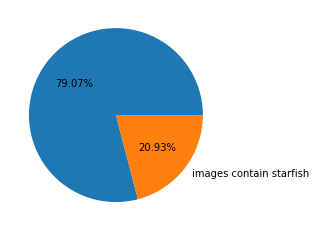

['0-16', '0-17', '0-18', '0-19', '0-20', '0-21', '0-22', '0-23', '0-24', '0-25', '0-26', '0-27', '0-28', '0-29', '0-30', '0-31', '0-32', '0-33', '0-34', '0-35', '0-36', '0-37', '0-38', '0-39', '0-40', '0-41', '0-42', '0-43', '0-44', '0-45', '0-46', '0-47', '0-48', '0-49', '0-50', '0-51', '0-52', '0-53', '0-54', '0-55', '0-56', '0-57', '0-58', '0-59', '0-60', '0-61', '0-62', '0-63', '0-64', '0-65', '0-66', '0-67', '0-68', '0-69', '0-70', '0-71', '0-72', '0-73', '0-74', '0-75', '0-76', '0-77', '0-78', '0-79', '0-80', '0-81', '0-82', '0-83', '0-84', '0-85', '0-86', '0-87', '0-88', '0-89', '0-90', '0-91', '0-92', '0-93', '0-94', '0-95', '0-96', '0-97', '0-98', '0-99', '0-100', '0-101', '0-102', '0-103', '0-104', '0-105', '0-106', '0-107', '0-108', '0-109', '0-110', '0-111', '0-112', '0-113', '0-114', '0-115', '0-116', '0-117', '0-118', '0-119', '0-120', '0-121', '0-122', '0-123', '0-124', '0-125', '0-126', '0-127', '0-128', '0-129', '0-130', '0-131', '0-132', '0-133', '0-134', '0-135', '0-

In [32]:
%cd /content/great-barrier-reef/
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
img_id = []
annotations = []
for index,row in train_data.iterrows():
  if row['annotations'] != '[]':
    img_id.append(row['image_id'])
    annotations.append(row['annotations'])
images = [(len(train_data)-len(img_id)),len(img_id)]
plt.pie(images, labels=['','images contain starfish'], autopct='%.2f%%')
plt.show()
print(img_id)

In [ ]:
filename = os.listdir("/content/great-barrier-reef/allimages/")
for index,img in enumerate(img_id):
  img_id[index] = img+'.jpg'

In [25]:
for file in filename:
  if file in img_id:
    shutil.move(os.path.join("/content/great-barrier-reef/allimages/",file),os.path.join("/content/great-barrier-reef/train_images/train/images",file))

filelist = os.listdir("/content/great-barrier-reef/train_images/train/images")
for index,img in enumerate(filelist):
  if index < len(filelist)*0.2:
    if img in img_id:
      shutil.move(os.path.join("/content/great-barrier-reef/train_images/train/images/",img),os.path.join("/content/great-barrier-reef/train_images/valid/images",img))
  else:
    break
!ls /content/great-barrier-reef/train_images/train/images/
!ls /content/great-barrier-reef/train_images/valid/images/

0-1000.jpg   0-4547.jpg  0-9449.jpg  1-4209.jpg  1-6229.jpg  1-9316.jpg
0-1001.jpg   0-4548.jpg  0-9450.jpg  1-4210.jpg  1-622.jpg   1-9317.jpg
0-1002.jpg   0-4549.jpg  0-9451.jpg  1-4211.jpg  1-6230.jpg  1-9318.jpg
0-1003.jpg   0-4550.jpg  0-9453.jpg  1-4213.jpg  1-6231.jpg  1-9319.jpg
0-1004.jpg   0-4551.jpg  0-9454.jpg  1-4214.jpg  1-6232.jpg  1-9320.jpg
0-1005.jpg   0-4552.jpg  0-9455.jpg  1-4215.jpg  1-6233.jpg  1-9321.jpg
0-1007.jpg   0-4556.jpg  0-9456.jpg  1-4217.jpg  1-6234.jpg  1-9322.jpg
0-1008.jpg   0-4558.jpg  0-9457.jpg  1-4219.jpg  1-6235.jpg  1-9323.jpg
0-1009.jpg   0-4559.jpg  0-9458.jpg  1-4220.jpg  1-6237.jpg  1-9324.jpg
0-100.jpg    0-4560.jpg  0-9459.jpg  1-4221.jpg  1-6238.jpg  1-9325.jpg
0-1011.jpg   0-4565.jpg  0-9460.jpg  1-4222.jpg  1-6239.jpg  1-9326.jpg
0-1013.jpg   0-4567.jpg  0-9461.jpg  1-4224.jpg  1-623.jpg   1-9330.jpg
0-1014.jpg   0-4568.jpg  0-9462.jpg  1-4225.jpg  1-6240.jpg  1-9335.jpg
0-1015.jpg   0-4569.jpg  0-9463.jpg  1-4226.jpg  1-6241.jpg  1-9

In [56]:
generateLabels(train_data,"/content/great-barrier-reef/train_images/train/labels/","/content/great-barrier-reef/train_images/train/images/")
generateLabels(train_data,"/content/great-barrier-reef/train_images/valid/labels/","/content/great-barrier-reef/train_images/valid/images/")

In [59]:
!cp -r /content/drive/MyDrive/Kaggle/4000images.yaml /content/great-barrier-reef/

In [60]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14371, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 14371 (delta 13), reused 8 (delta 3), pack-reused 14342
Receiving objects: 100% (14371/14371), 13.45 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (9912/9912), done.


# Start trainning
Resume Single-GPU
You may not change settings when resuming, and no additional arguments other than --resume should be passed, with an optional path to the checkpoint you'd like to resume from. If no checkpoint is passed the most recently updated last.pt in your yolov5/ directory is automatically found and used:

python train.py **--resume**  # automatically find latest checkpoint (searches yolov5/ directory)

**python train.py --resume path/to/last.pt**  # specify resume checkpoint

In [61]:
# Try with default image size first (640)
!python /content/great-barrier-reef/yolov5/train.py --epochs 30 --data /content/great-barrier-reef/4000images.yaml --batch-size 16 --name starfish_model01 --cache ram --cfg /content/great-barrier-reef/yolov5/models/yolov5s.yaml

train: weights=yolov5/yolov5s.pt, cfg=/content/great-barrier-reef/yolov5/models/yolov5s.yaml, data=/content/great-barrier-reef/4000images.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=starfish_model01, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirements "ipython" "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per

In [62]:
!cp -r /content/great-barrier-reef/yolov5/runs/train/ /content/drive/MyDrive/Kaggle/ 